##Importing Libraries

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/home/mohi/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## Load Data

In [ ]:
# Load the dataset into a pandas dataframe
train_df = pd.read_csv('train.csv')
validate_df = pd.read_csv('validate.csv')

In [ ]:
# Display first few rows of the dataset
print("Train Data Head:")
print(train_df.head())
# Each row in the data set contains a label and a flattend 28x28 pixel image of a digit

Train Data Head:
   5  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.608  0.609  0.610  \
0  8  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  7  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  9  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  9  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  0  0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.611  0.612  0.613  0.614  0.615  0.616  0.617  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]


## Preprocessing

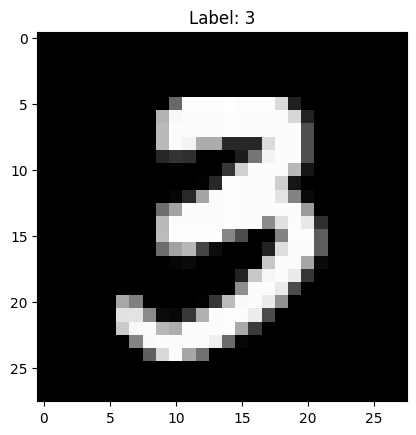

In [ ]:
# Convert a row to an image
def show_image(image_row, label=None):
    image = image_row.to_numpy().reshape(28, 28)
    plt.imshow(image, cmap='gray')
    if label is not None:
        plt.title(f"Label: {label}")
    plt.show()

# display the ith image in the dataset
i = 30

show_image(train_df.iloc[i, 1:], train_df.iloc[i, 0])

## Applying Threshhold

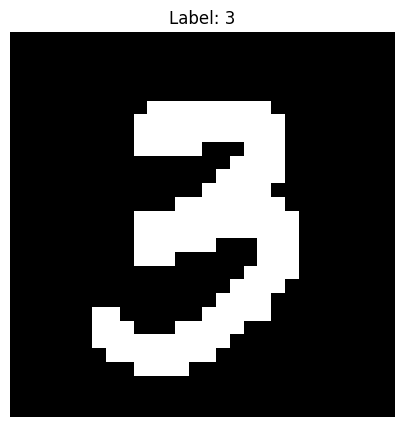

In [ ]:
# Apply threshold to the images to convert them to binary (black and white)

def apply_threshold(image_row, threshold=100):
    return (image_row > threshold).astype(int)

# Display the i-th thresholded image
i = 30  # Specify the index of the image to display
image = train_df.iloc[i, 1:]  # Extract pixel data for the i-th image
label = train_df.iloc[i, 0]  # Extract the label for the i-th image

thresholded_image = apply_threshold(image.values, threshold=100)  # Apply threshold

plt.figure(figsize=(5, 5))
plt.imshow(thresholded_image.reshape(28, 28), cmap='gray')  # Reshape and display
plt.title(f"Label: {label}")  # Set title with label
plt.axis('off')  # Turn off axes for better visualization
plt.show()

In [ ]:
# Create a new DataFrame to store thresholded images
new_train_df = train_df.copy()  # Copy the original DataFrame to preserve labels

# Apply threshold to all images in train_df and store in new_train_df
new_train_df.iloc[:, 1:] = train_df.iloc[:, 1:].apply(apply_threshold, axis=1)


In [ ]:
# Apply threshold to all images in validate_df
new_validate_df = validate_df.copy()  # Copy the original DataFrame to preserve labels
new_validate_df.iloc[:, 1:] = validate_df.iloc[:, 1:].apply(apply_threshold, axis=1)

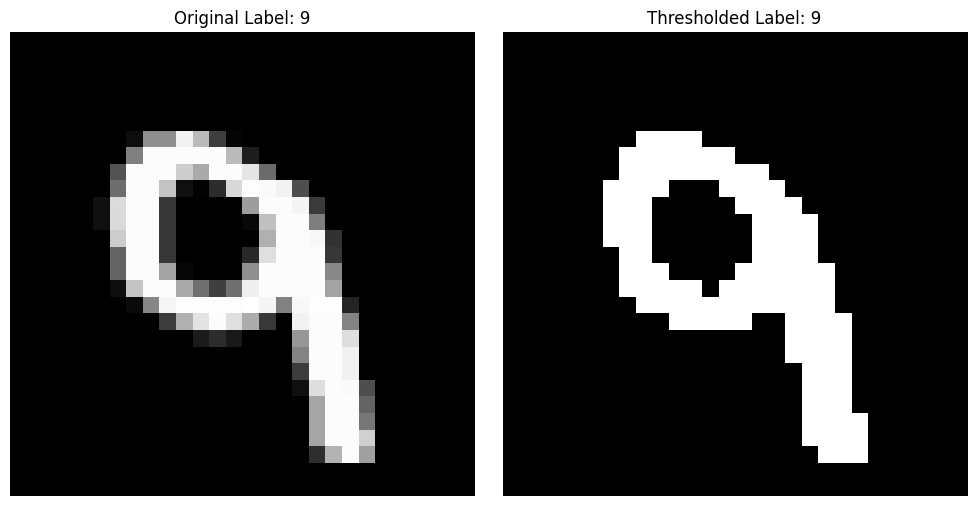

In [ ]:
import matplotlib.pyplot as plt

# Specify the index of the image to display
index_to_display = 10000  # Change this index to display a different image

# Extract the original and thresholded images
original_image = train_df.iloc[index_to_display, 1:].values.reshape(28, 28)
thresholded_image = new_train_df.iloc[index_to_display, 1:].values.reshape(28, 28)

# Create a figure to display both images
plt.figure(figsize=(10, 5))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title(f"Original Label: {train_df.iloc[index_to_display, 0]}")
plt.axis('off')

# Display the thresholded image
plt.subplot(1, 2, 2)
plt.imshow(thresholded_image, cmap='gray')
plt.title(f"Thresholded Label: {new_train_df.iloc[index_to_display, 0]}")
plt.axis('off')

plt.tight_layout()
plt.show()

## Calculating Mean_Variance

In [ ]:
# Function to calculate mean and variance for each image
def calculate_mean_and_variance(image_row):
    image = image_row.to_numpy().reshape(28, 28)  # Reshape into 28x28 image
    mean = np.mean(image)  # Calculate the mean of pixel values
    variance = np.var(image)  # Calculate the variance of pixel values
    return mean, variance

# Example for the first image in the dataset
mean, variance = calculate_mean_and_variance(train_df.iloc[0, 1:])
print("Mean:", mean, "Variance:", variance)

Mean: 36.80102040816327 Variance: 6695.924692836319


## Training Data

In [ ]:
# Prepare feature vectors (mean and variance) and labels for the training set
train_features = []
train_labels = []

for i in range(len(train_df)):
    mean, variance = calculate_mean_and_variance(train_df.iloc[i, 1:])
    train_features.append([mean, variance])  # Features as a list of [mean, variance]
    train_labels.append(train_df.iloc[i, 0])  # Label (digit)

train_features = np.array(train_features)
train_labels = np.array(train_labels)

# Similarly, prepare the validation set features and labels
validate_features = []
validate_labels = []

for i in range(len(validate_df)):
    mean, variance = calculate_mean_and_variance(validate_df.iloc[i, 1:])
    validate_features.append([mean, variance])
    validate_labels.append(validate_df.iloc[i, 0])

validate_features = np.array(validate_features)
validate_labels = np.array(validate_labels)

In [ ]:
def euclidean_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

In [ ]:
def predict(test_features, train_features, train_labels):
    predictions = []
    for test_point in test_features:
        # Compute the distances between the test_point and all training points
        distances = [euclidean_distance(test_point, train_point) for train_point in train_features]

        # Find the index of the closest training point
        closest_index = np.argmin(distances)  # Index of the minimum distance
        predictions.append(train_labels[closest_index])  # Label of the closest point
    return predictions

## Calculating Accuracy

In [ ]:
def calculate_accuracy(predictions, true_labels):
    correct = sum(predictions == true_labels)  # Count the correct predictions
    accuracy = correct / len(true_labels)  # Calculate accuracy
    return accuracy

# Make predictions on the validation set
predictions = predict(validate_features, train_features, train_labels)

# Calculate accuracy on the validation set
accuracy = calculate_accuracy(np.array(predictions), validate_labels)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.8627


In [ ]:
# Check the number of unique labels in the dataset
unique_labels = new_train_df.iloc[:, 0].unique()
num_unique_labels = len(unique_labels)
print(f"Number of unique labels: {num_unique_labels}")

Number of unique labels: 10


In [ ]:
print("Validation Accuracy by using mean variance: {:.2f}%".format(accuracy * 100))

Validation Accuracy by using mean variance: 86.27%


## Testing Predictions

In [ ]:
# Assuming test.csv contains image ids and pixel values (without labels)
test_df = pd.read_csv('test.csv')
# Apply threshold to all images in test_df
new_test_df = test_df.copy()  # Copy the original DataFrame to preserve image_id
new_test_df.iloc[:, 1:] = test_df.iloc[:, 1:].apply(apply_threshold, axis=1)  # Apply threshold to all pixel data
test_features = []

# Extract features (mean and variance) for the test set
for i in range(len(test_df)):
    mean, variance = calculate_mean_and_variance(test_df.iloc[i, 1:])
    test_features.append([mean, variance])

test_features = np.array(test_features)

# Make predictions on the test set
test_predictions = predict(test_features, train_features, train_labels)

# Create a DataFrame for the test set predictions
submission_df = pd.DataFrame({
    'ID': test_df['image_id'],  # Image ids
    'Label': test_predictions       # Predicted labels
})

# Save to a CSV file
submission_df.to_csv('submission.csv', index=False)